In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_dataset_in_with_finlit.csv to final_dataset_in_with_finlit.csv


In [ ]:
#AFTER GETTING THE DATASET DOING EXPLORATORY DATA ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("final_dataset_in_with_finlit.csv")

# Display the first few rows
print(df.head())


  country_x  Year       GDP_USD  GDP_per_Capita_USD  \
0        IN  2001  4.854401e+11          450.357901   
1        IN  2002  5.149391e+11          469.149929   
2        IN  2003  6.077007e+11          544.143134   
3        IN  2004  7.091527e+11          624.258827   
4        IN  2005  8.203838e+11          710.488080   

   Life_Insurance_Penetration_pct_GDP  Insurance_Density_USD  \
0                                2.15                   11.5   
1                                2.59                   14.7   
2                                2.26                   16.4   
3                                2.53                   19.7   
4                                2.53                   22.7   

   Financial_Literacy_%  
0                  20.0  
1                  20.0  
2                  20.0  
3                  20.0  
4                  20.0  


Using the following numerical columns for analysis: ['Year', 'GDP_USD', 'GDP_per_Capita_USD', 'Life_Insurance_Penetration_pct_GDP', 'Insurance_Density_USD', 'Financial_Literacy_%']

--- Correlation Matrix Heatmap ---


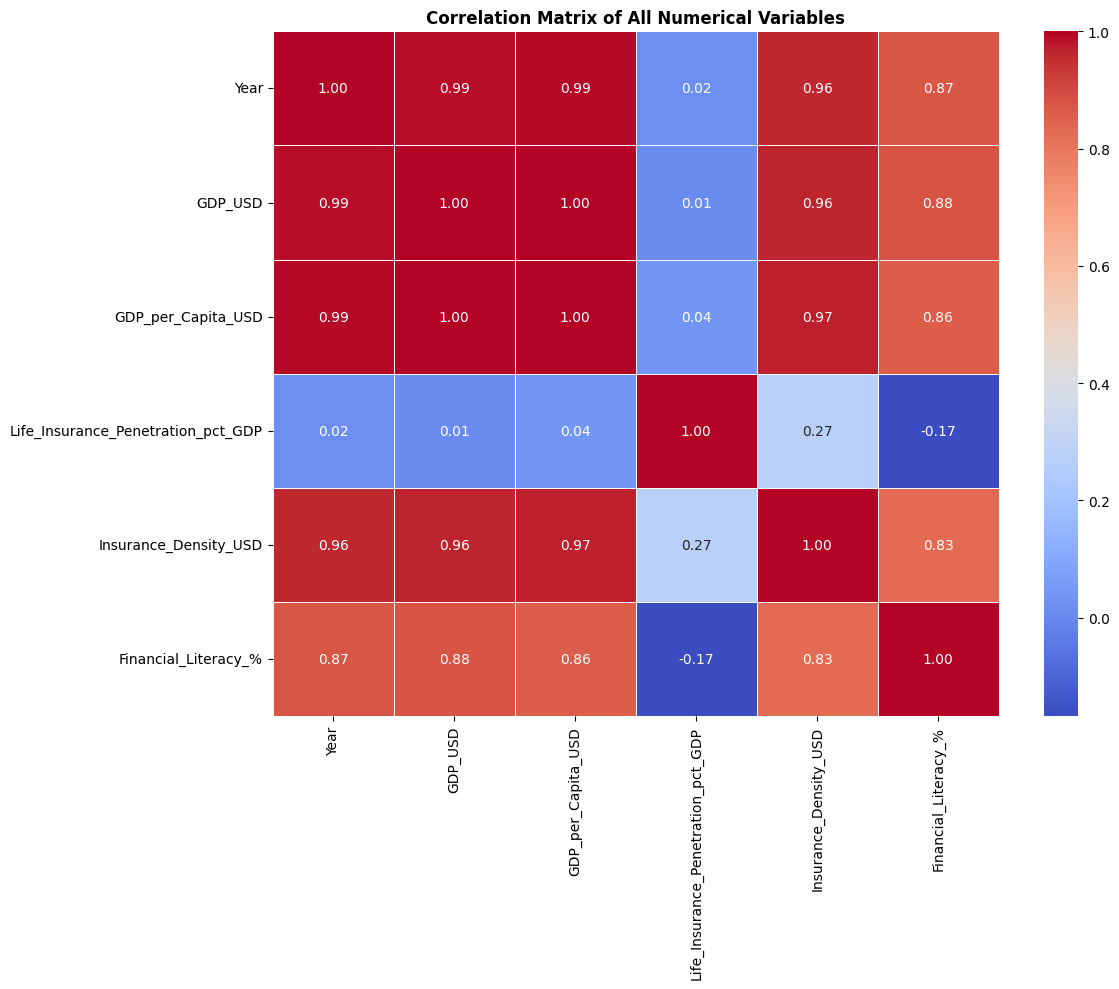


--- Scatter Plot: GDP per Capita vs. Insurance Density ---


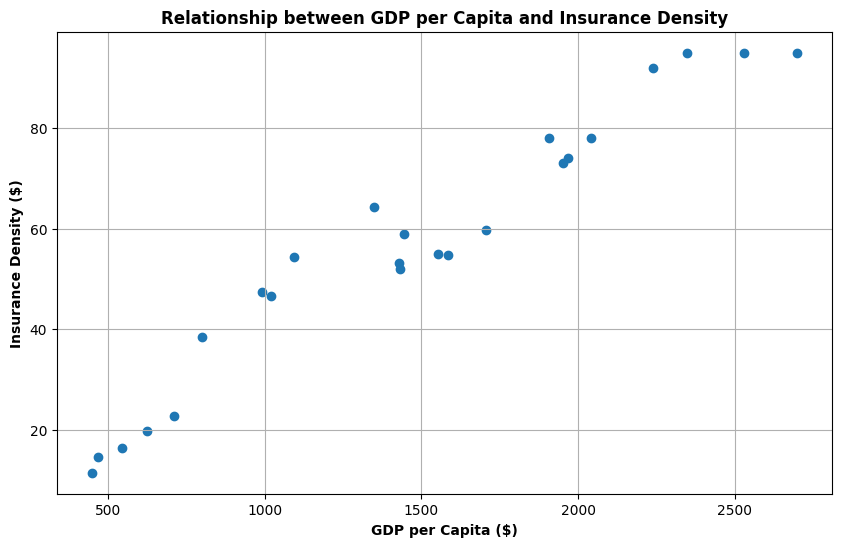


--- Histogram: Distribution of Insurance Density ---


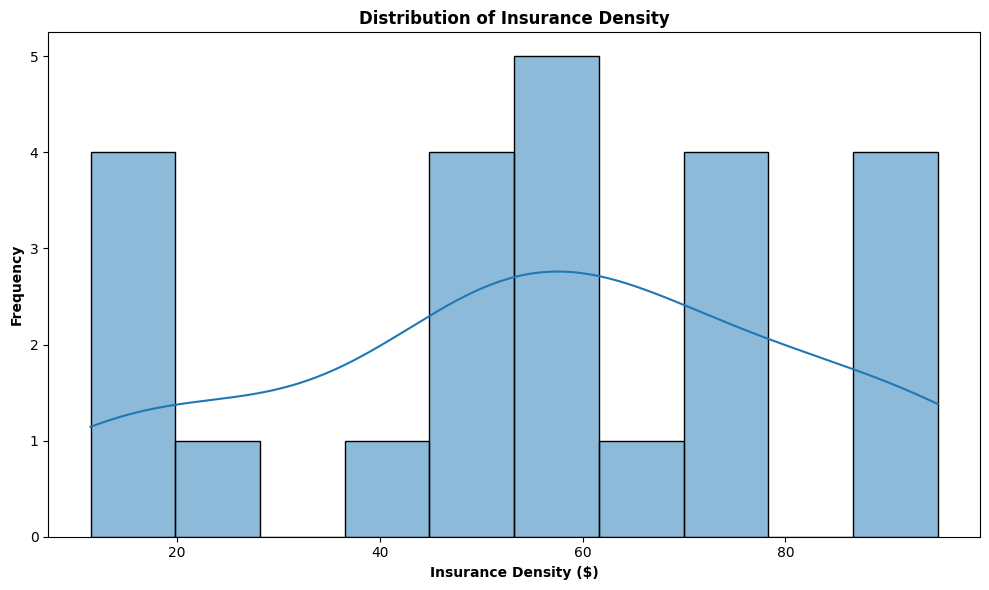


--- Pairplot for an overview of all variables ---


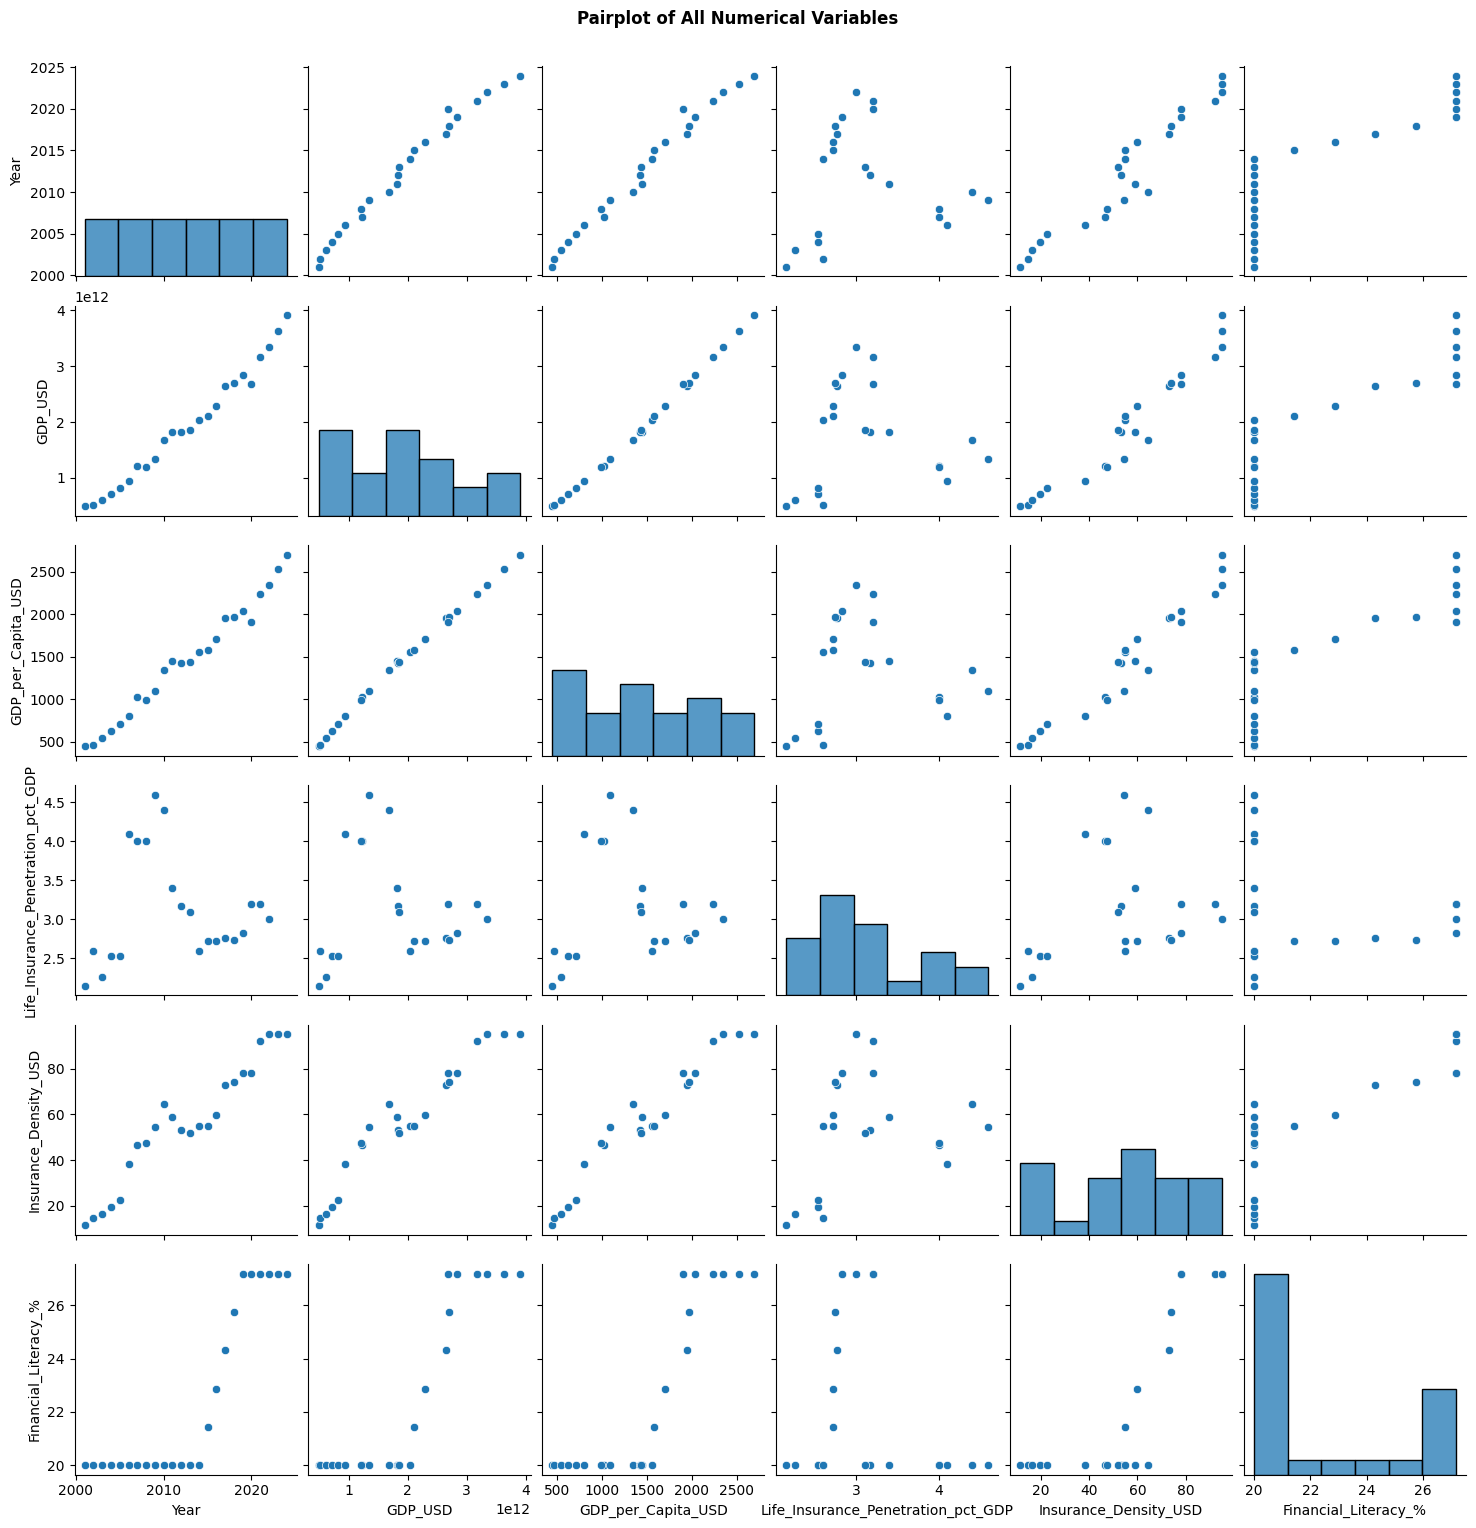

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#  1. Load the dataset
# Make sure your data file is in the same directory as your Python script.
try:
    df = pd.read_csv("final_dataset_in_with_finlit.csv")
except FileNotFoundError:
    print("Error: The file 'final_dataset_in_with_finlit.csv' was not found.")
    print("Please make sure the file is in the correct directory.")
    exit()

#  2. Select all numerical columns for analysis and plotting
# This line automatically finds all columns with a numerical data type.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Using the following numerical columns for analysis: {numerical_cols}\n")

# 3. Plot the correlation matrix as a heatmap
print("--- Correlation Matrix Heatmap ---")
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Variables', fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Create additional exploratory plots

# Scatter plot to visualize the relationship between two specific variables
print("\n--- Scatter Plot: GDP per Capita vs. Insurance Density ---")
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP_per_Capita_USD'], df['Insurance_Density_USD'])
plt.xlabel('GDP per Capita ($)', fontweight='bold')
plt.ylabel('Insurance Density ($)', fontweight='bold')
plt.title('Relationship between GDP per Capita and Insurance Density', fontweight='bold')
plt.grid(True)
plt.show()

# Histogram to visualize the distribution of a single variable
print("\n--- Histogram: Distribution of Insurance Density ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['Insurance_Density_USD'], kde=True, bins=10)
plt.xlabel('Insurance Density ($)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Insurance Density', fontweight='bold')
plt.tight_layout()
plt.show()

# Pairplot for an overview of all relationships and distributions
print("\n--- Pairplot for an overview of all variables ---")
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of All Numerical Variables', y=1.02, fontweight='bold')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#  1. Load your data
# Replace 'your_data.csv' with the actual name of your CSV file.
try:
    df = pd.read_csv("final_dataset_in_with_finlit.csv")
except FileNotFoundError:
    print("Error: The file 'final_dataset_in_with_finlit.csv' was not found.")
    print("Please make sure the file is in the correct directory.")
    exit()

#  2. Define features (X) and target (y)
features = ['GDP_per_Capita_USD', 'Financial_Literacy_%']
target = 'Insurance_Density_USD'

# Check if the required columns exist in the DataFrame
if not all(col in df.columns for col in features + [target]):
    missing_cols = [col for col in features + [target] if col not in df.columns]
    print(f"Error: The following required columns are missing from the dataset: {missing_cols}")
    exit()

X = df[features]
y = df[target]

#  3. Split the data into training and testing sets
# 80% of the data will be used for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  4. Train and evaluate the Random Forest Regressor model
print("--- Random Forest Regressor Results ---")

# Initialize the Random Forest Regressor model
# 'n_estimators' is the number of trees in the forest.
# 'random_state' ensures reproducibility.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared ($R^2$): {r2:.2f}")

print("-" * 30)

# --- 5. Example of making a prediction with new data ---
print("\n--- Example Prediction ---")
new_data = pd.DataFrame({
    'GDP_per_Capita_USD': [10000, 25000],
    'Financial_Literacy_%': [0.75, 0.90]
})
predicted_values = rf_model.predict(new_data)

for i, value in enumerate(predicted_values):
    print(f"Predicted Insurance_Density_USD for data point {i+1}: {value:.2f}")


--- Random Forest Regressor Results ---
Mean Squared Error (MSE): 11.28
R-squared ($R^2$): 0.98
------------------------------

--- Example Prediction ---
Predicted Insurance_Density_USD for data point 1: 76.17
Predicted Insurance_Density_USD for data point 2: 76.17


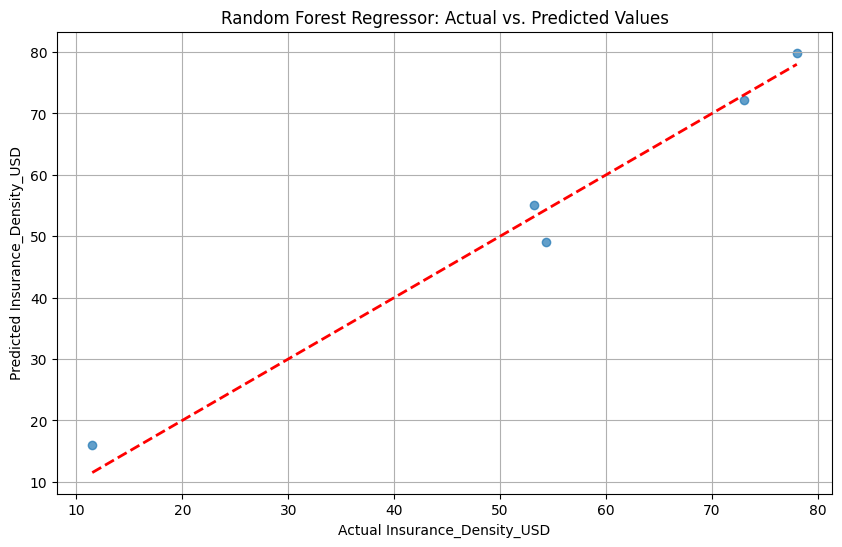

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your model evaluation
# y_test: The actual values from the test set
# y_pred: The predicted values from the model

# --- Plotting the results ---
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Insurance_Density_USD")
plt.ylabel("Predicted Insurance_Density_USD")
plt.title("Random Forest Regressor: Actual vs. Predicted Values")
plt.grid(True)
plt.show()


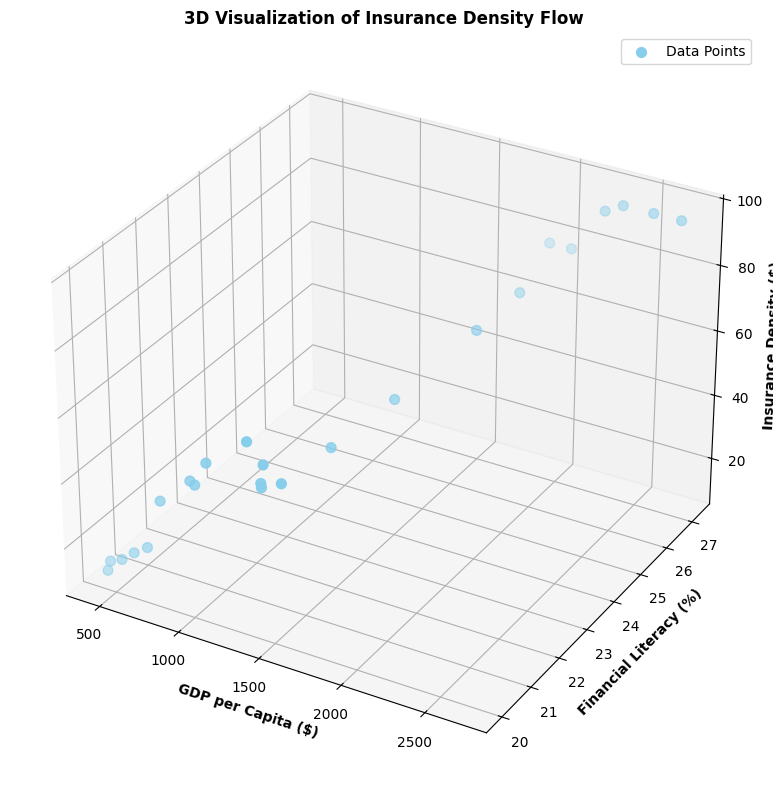

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Load your data ---
# Make sure your data file is in the same directory as your Python script.
try:
    df = pd.read_csv("final_dataset_in_with_finlit.csv")
except FileNotFoundError:
    print("Error: The file 'final_dataset_in_with_finlit.csv' was not found.")
    print("Please make sure the file is in the correct directory.")
    exit()

# --- 2. Define features and target variable ---
# We will use these columns for plotting.
x_data = df['GDP_per_Capita_USD']
y_data = df['Financial_Literacy_%']
z_data = df['Insurance_Density_USD']

# --- 3. Create a 3D scatter plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter the data points
ax.scatter(x_data, y_data, z_data, c='skyblue', s=50, label='Data Points')

# Set the labels and title
ax.set_xlabel('GDP per Capita ($)', fontweight='bold')
ax.set_ylabel('Financial Literacy (%)', fontweight='bold')
ax.set_zlabel('Insurance Density ($)', fontweight='bold')
ax.set_title("3D Visualization of Insurance Density Flow", fontweight='bold')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
